In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data=pd.read_csv('/content/car_age_price.csv')

In [3]:
# find rows and columns
data.shape

(112, 2)

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
# how many unique values
data['Year'].nunique()

8

In [8]:
# what are the unique values
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [11]:
# avoid one preprocessing steps---encoding
# non-numeric into numeric--here all are non numeric
# check null values
data.isnull().sum()

,0
Year,0
Price,0


In [ ]:
# avoid preprocessing step- handling missing values, here no any null values

In [12]:
# statistic of data
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

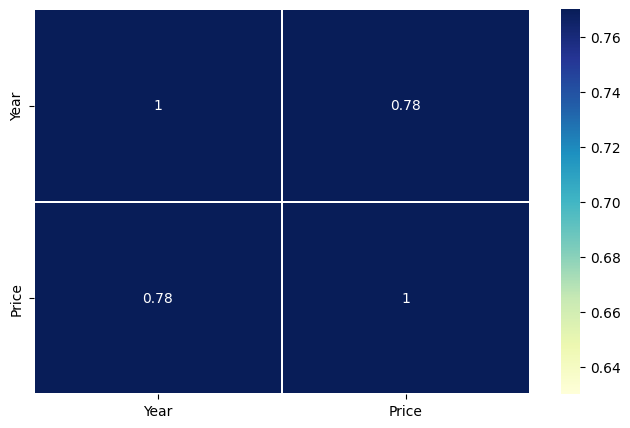

In [38]:
# find correlation matrix

corrmatrix=data.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

In [39]:
# Find the best linear relationship between year and price.
from sklearn.linear_model import LinearRegression

In [18]:
# Reshape the data for modeling
X = data[['Year']].values
y = data['Price'].values

In [19]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
# Predict prices based on the model
y_pred = model.predict(X)

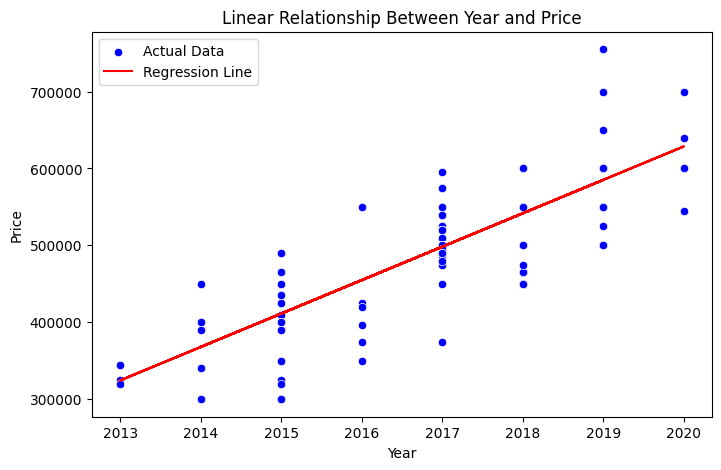

In [37]:
# Plot the data and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Year"], y=data["Price"], label="Actual Data", color="blue")
plt.plot(data["Year"], y_pred, color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Linear Relationship Between Year and Price")
plt.legend()
plt.show()

In [43]:
# predict the possible price of a 2022 model second-hand grand i10?
predicted_price = model.predict(np.array([[2022]]))
print(f"Predicted Price for 2022 model: {predicted_price[0]:,.2f}")

Predicted Price for 2022 model: 715,488.08


In [40]:
# Learn Lasso
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)


In [42]:
# Lasso Regression
lasso_model = Lasso(alpha=1000)  # Adjust alpha for better tuning
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

In [26]:
# Evaluate models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_linear = r2_score(y, y_pred_linear)
r2_lasso = r2_score(y, y_pred_lasso)

In [35]:
print(f"Linear Regression - MSE: {mse_linear:.2f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}")
print(f"Linear Regression - R²: {r2_linear:.2f}")
print(f"Lasso Regression - R²: {r2_lasso:.2f}")


Linear Regression - MSE: 3276721166.56
Lasso Regression - MSE: 3277101115.07
Linear Regression - R²: 0.60
Lasso Regression - R²: 0.60


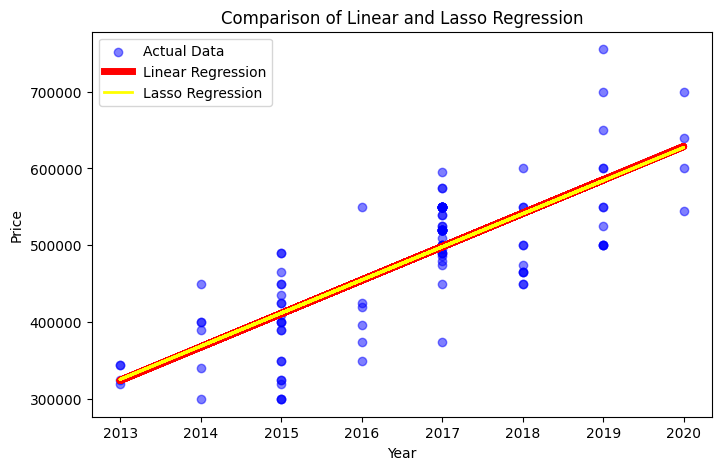

In [47]:
plt.figure(figsize=(8, 5))
plt.scatter(data["Year"], data["Price"], label="Actual Data", color="blue", alpha=0.5)
plt.plot(data["Year"], y_pred_linear, color="red", label="Linear Regression",linewidth=5)
plt.plot(data["Year"], y_pred_lasso, color="yellow", label="Lasso Regression",linewidth=2)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Comparison of Linear and Lasso Regression")
plt.legend()
plt.show()